<BarContainer object of 33 artists>

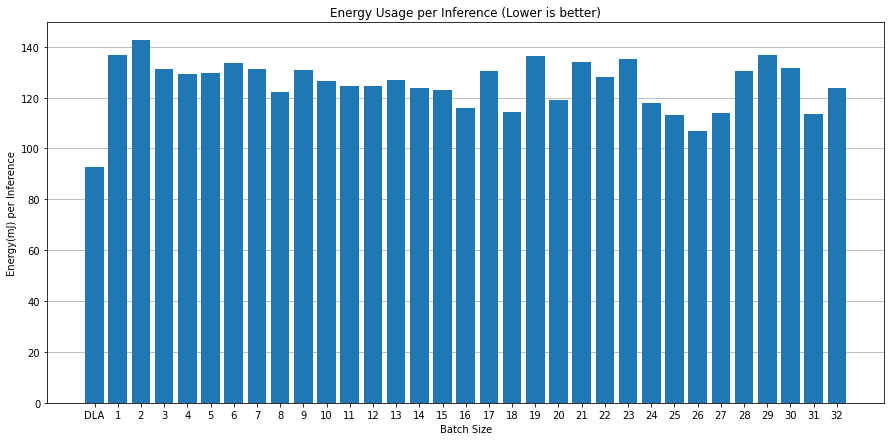

In [1]:
import matplotlib.pyplot as plt

frequency = "921600000"

# Batch Size,Concurrency,Inferences/Second,Client Send,Network+Server Send/Recv,Server Queue,Server Compute Input,Server Compute Infer,Server Compute Output,Client Recv,p50 latency,p90 latency,p95 latency,p99 latency
gpu_data = []
gpu_power_data = []
gpu_timings = []

# GPU
with open(f"data/{frequency}_data.csv", "r") as f:
  gpu_data = [l.strip().split(",") for l in f.readlines()[1:]]

with open(f"data/{frequency}_power.csv", "r") as f:
  gpu_power_data = [l.strip().split(",") for l in f.readlines()]

with open(f"data/{frequency}_timings.csv", "r") as f:
  gpu_timings = [l.strip().split(",") for l in f.readlines()[1:]]


dla_data = []
dla_power_data = []
dla_timings = []

# DLA
with open(f"data/dla_data.csv", "r") as f:
  dla_data = [l.strip().split(",") for l in f.readlines()[1:]]

with open(f"data/dla_power.csv", "r") as f:
  dla_power_data = [l.strip().split(",") for l in f.readlines()[1:]]

with open(f"data/dla_timings.csv", "r") as f:
  dla_timings = [l.strip().split(",") for l in f.readlines()[1:]]


dla_power = [p for p in dla_power_data if p[0] > dla_timings[0][0] and p[0] < dla_timings[0][1]]
avg_dla_power = sum([float(r[1]) for r in dla_power])/len(dla_power)
joule_per_inference = avg_dla_power / float(dla_data[0][2])


x = ['DLA']
y = [joule_per_inference*1000]

for start, stop, batch_size in gpu_timings:
  power = [p for p in gpu_power_data if p[0] > start and p[0] < stop]
  d = [d for d in gpu_data if d[0] == batch_size][0]
  avg_power = sum([float(r[1]) for r in power])/len(power)
  joule_per_inference = avg_power / float(d[2])

  x.append(batch_size)
  y.append(joule_per_inference*1000)

fig, ax = plt.subplots(figsize=(15, 7))
ax.set_axisbelow(True)
ax.grid(axis='y')
ax.set_title("Energy Usage per Inference (Lower is better)")
ax.set_xlabel("Batch Size")
ax.set_ylabel("Energy(mJ) per Inference")

plt.bar(x, y)
